# Table of Contents
#  Project Report: Customer Churn Prediction & Prevention
1. [Project Overview](#1-project-overview)
2. [Data Collection and exploration ](#2-data-collection-exploration)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
4. [Feature Engineering](#4-feature-engineering)
5. [Model Training ](#5-model-training)
6. [Model Evaluation & Results](#6-model-evaluation-results)
7. [Project Report : Customer churn prediction & prevention](#7-project-report)
8. [Business Recommendations](#8-business-recommendations)

## 1-project-overview

### 1. Problem Statement
Customer churn (the rate at which customers stop doing business with an entity) is a critical metric for telecommunications companies. Acquiring a new customer is significantly more expensive than retaining an existing one. The goal of this project is to identify customers who are at risk of leaving and understand the key factors driving their decision.

### 2. Objective
* **Analyze** customer demographics, services, and account information to find patterns associated with churn.
* **Build** a predictive machine learning model to identify at-risk customers.
* **Optimize** for **Recall** to ensure we catch as many potential churners as possible.

### 3. The Dataset
The dataset contains information on **7,043 customers** with **21 features**, including:
* **Demographics:** Gender, Senior Citizen, Partner, Dependents.
* **Services:** Phone, Internet, Online Security, Streaming, etc.
* **Account Info:** Contract Type, Payment Method, Monthly Charges, Total Charges.
* **Target Variable:** `Churn` (Yes/No).

### 4. Methodology
1.  **EDA:** Visualizing distributions and correlations to find key drivers.
2.  **Preprocessing:** Handling missing values, cleaning categorical inconsistencies, and feature scaling.
3.  **Model Training:** Comparing **Logistic Regression**, **Random Forest**, and **XGBoost**.
4.  **Evaluation:** Focusing on Recall and F1-Score for the minority class (Churn).

# 2-data-collection-exploration

In [7]:
import pandas as pd

df=pd.read_csv("data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#Checking if there are missing values : 
print(df.isna().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#checking the distribution of our target column : Churn
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

###  Data Profile & Strategic Decisions

**1. Dataset Dimensions**
* **Size:** Small (7,043 rows).
* **Features:** 21 columns.
* **Ratio:** With ~7,000 rows and only 21 features, we have a high Row-to-Feature ratio. This reduces the risk of overfitting due to dimensionality, allowing the model to generalize well.

**2. Target Distribution (Imbalance)**
* **No Churn:** 5,174 (73.5%)
* **Yes Churn:** 1,869 (26.5%)
* **Implication:** The dataset is **imbalanced**. A baseline model could achieve ~73% accuracy simply by predicting "No" for everyone. Therefore, **Accuracy is a misleading metric** for this project.

**3. Handling Strategy**
To address the imbalance, I evaluated several approaches:
* **❌ Undersampling/Oversampling (SMOTE):** Discarded to avoid information loss (Undersampling) or introducing synthetic noise (SMOTE) on a small dataset.
* **✅ Class Weights:** Selected as the primary strategy. By penalizing the model more heavily for missing a "Churn" case, we force it to pay attention to the minority class.
* **✅ Evaluation Metrics:** Shifted focus from Accuracy to **Recall** (to minimize False Negatives) and **F1-Score**.

# 3-exploratory-data-analysis-eda

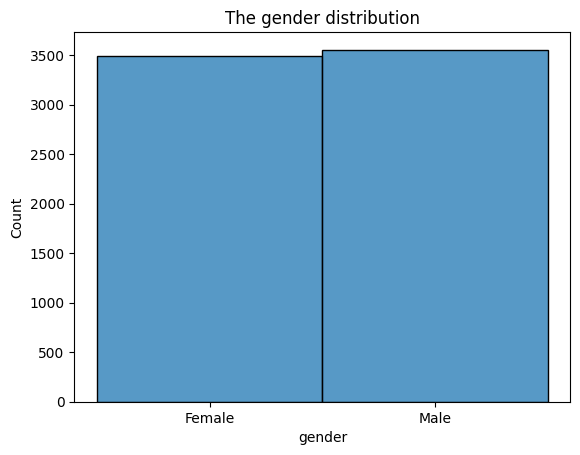

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df,x="gender")
plt.title("The gender distribution")
plt.show()

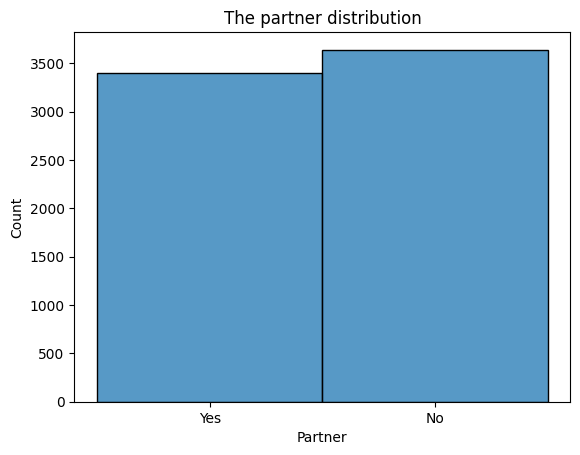

In [12]:
sns.histplot(data=df,x="Partner")
plt.title("The partner distribution")
plt.show()

In [13]:
print(df.select_dtypes("number").head())
#Checking the numerical features if they contain a negative value or not 
print(df.describe())



   SeniorCitizen  tenure  MonthlyCharges
0              0       1           29.85
1              0      34           56.95
2              0       2           53.85
3              0      45           42.30
4              0       2           70.70
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [17]:
df1=df[["MultipleLines","PhoneService"]] 
# IF a person with no phone service then it's clearly it doesnt have multople lines ==> so we can logically group them with No
df["MultipleLines"]=df["MultipleLines"].replace("No phone service","No")
print(df['MultipleLines'].value_counts())


MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


In [18]:
df1=df[["OnlineSecurity","InternetService"]] 
(df1[df1["OnlineSecurity"]=="No internet service"] ).value_counts()  
# If a customer has no internet, can they have online security? No. Therefore, "No internet service" is functionally the same as "No"
df["OnlineSecurity"]=df["OnlineSecurity"].replace("No internet service","No")


In [19]:
df["TechSupport"]=df["TechSupport"].replace("No internet service","No")
df["StreamingMovies"]=df["StreamingMovies"].replace("No internet service","No")
df["StreamingTV"]=df["StreamingTV"].replace("No internet service","No")
df["DeviceProtection"]=df["DeviceProtection"].replace("No internet service","No")
df["OnlineBackup"]=df["OnlineBackup"].replace("No internet service","No")

###  Data Cleaning: Handling Redundant Categories

**Observation:**
In features like `MultipleLines` , `TechSupport` and others above , there is a category called `'No phone service'`.
However, we already have a feature called `PhoneService`. If `PhoneService` is 'No', then `MultipleLines` is inherently 'No'.

**The Issue:**
Keeping `'No phone service'` creates a third category that adds **redundancy** and potentially introduces **multicollinearity** (perfect correlation) with the `PhoneService` column.

**Action:**
I will replace `'No phone service'` with `'No'`.
* **Benefit:** This reduces the feature from 3 categories to 2 (Binary), making it cleaner and easier for the model to interpret without losing any information.

### 1)-Dealing with numerical features

In [20]:
df["MonthlyCharges"]=df["MonthlyCharges"].astype('float')

#### Transfirming objects into numerical type using pd.to_numeric and treating missing values NA 

In [21]:
df["TotalCharges_cleaned"]=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
#Counting Missing values :

print(df['TotalCharges_cleaned'].isna().sum() )

#Dropping missing values

df['TotalCharges_cleaned'].dropna(inplace=True)
df=df.dropna()

#Dropping TotalCharges column 
df=df.drop(columns='TotalCharges')

11


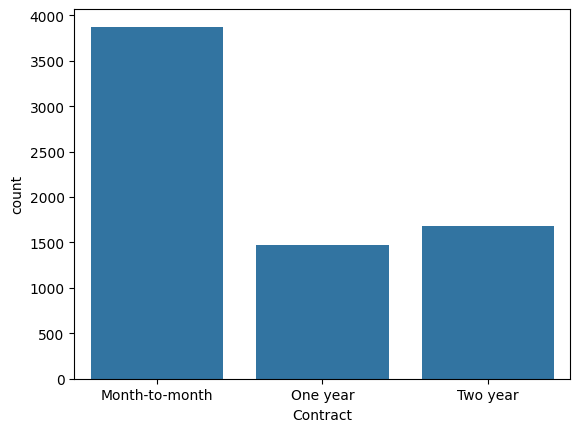

In [ ]:
sns.countplot(data=df,x='Contract')
plt.show()

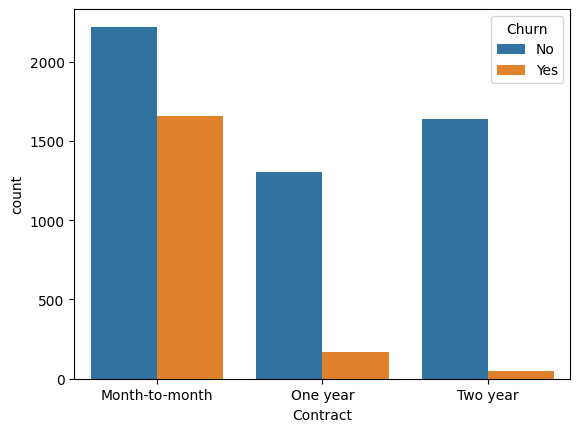

In [ ]:
sns.countplot(data=df,x='Contract',hue="Churn")
plt.show()

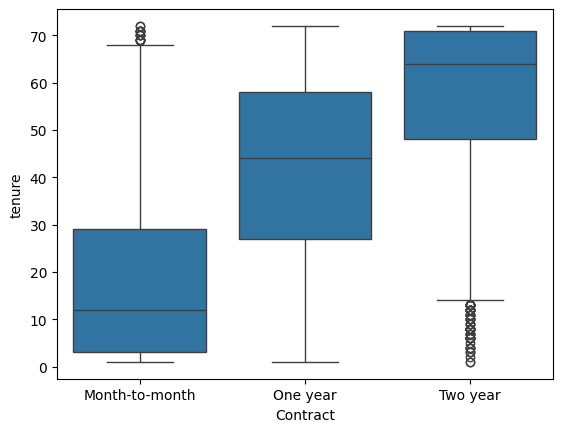

In [ ]:
sns.boxplot(data=df,x="Contract",y="tenure")
plt.show()

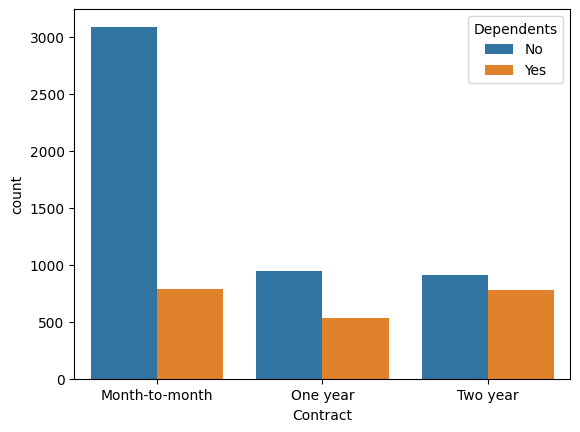

In [ ]:
sns.countplot(data=df, x='Contract', hue='Dependents')
plt.show()

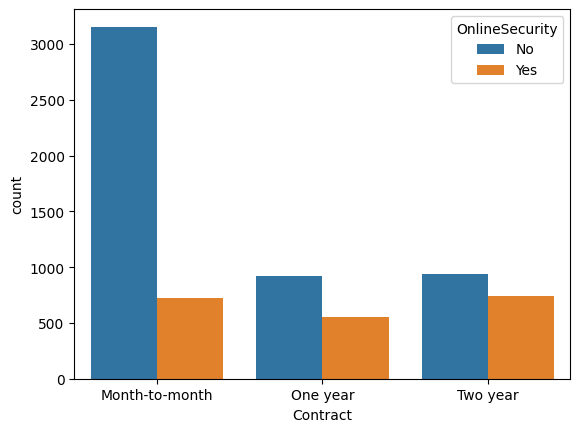

In [ ]:
sns.countplot(data=df, x='Contract', hue='OnlineSecurity')
plt.show()

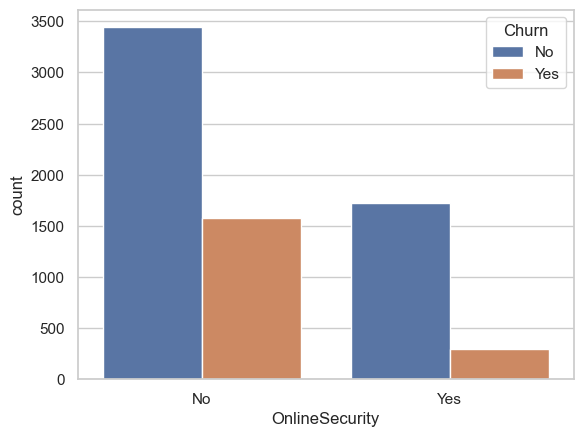

In [ ]:
sns.set(style="whitegrid")
sns.countplot(data=df ,x="OnlineSecurity",hue="Churn")
plt.show()

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


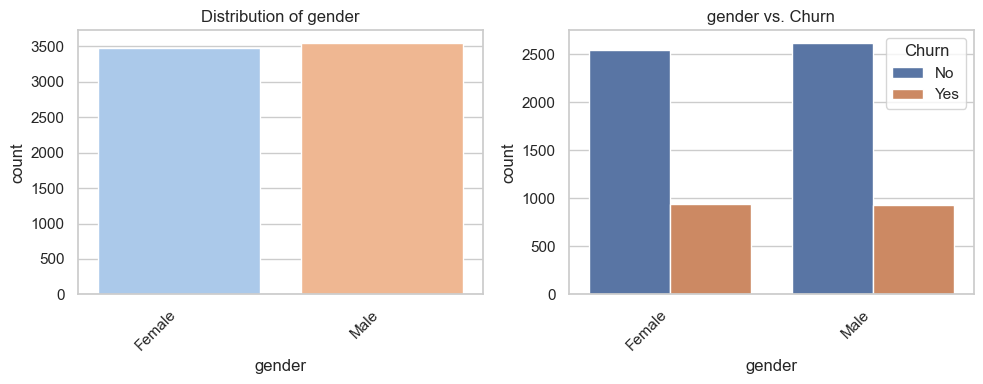

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


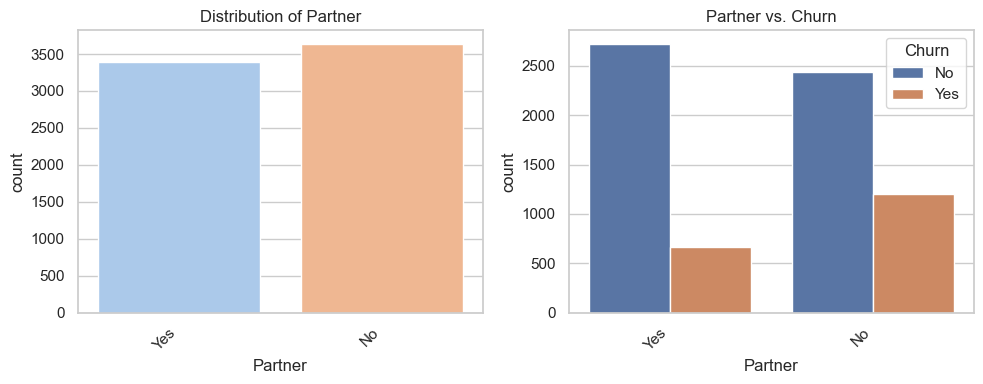

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


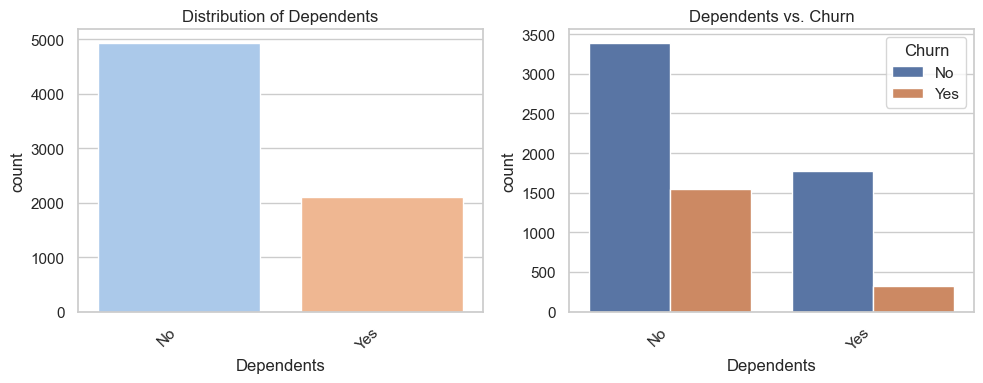

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


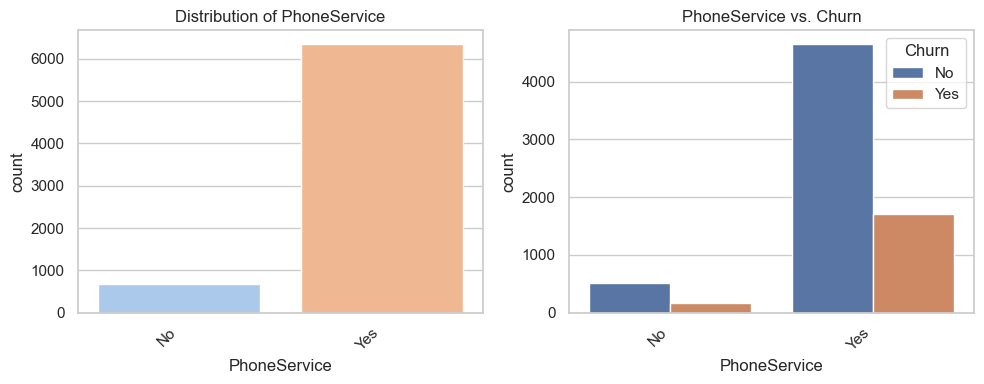

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


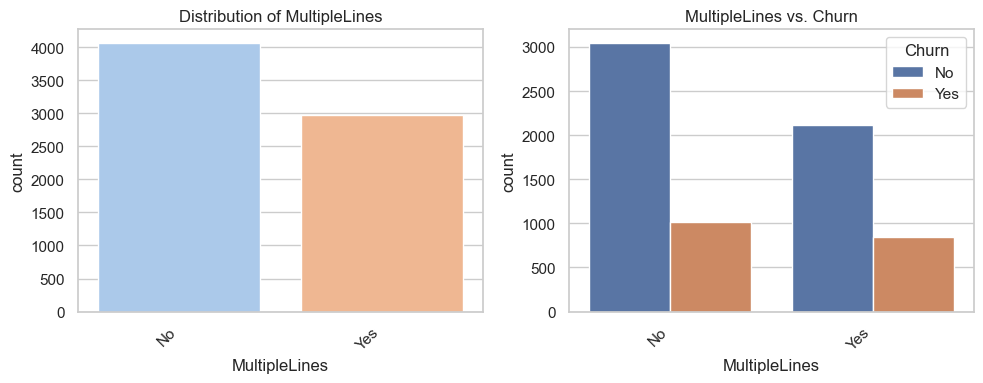

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


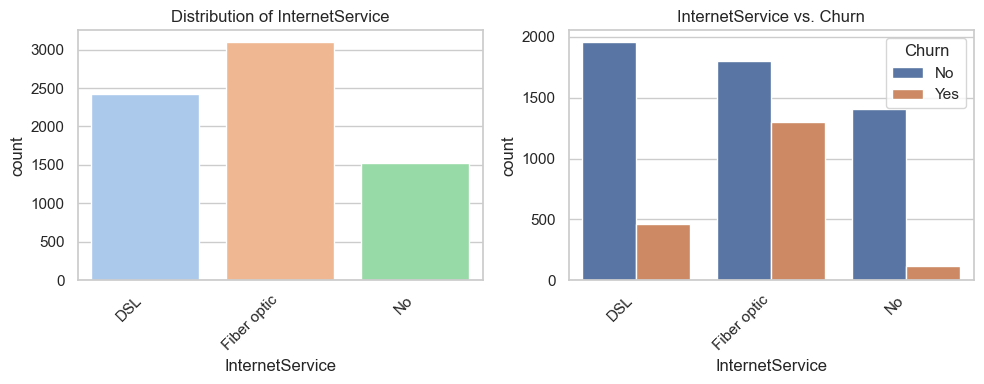

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


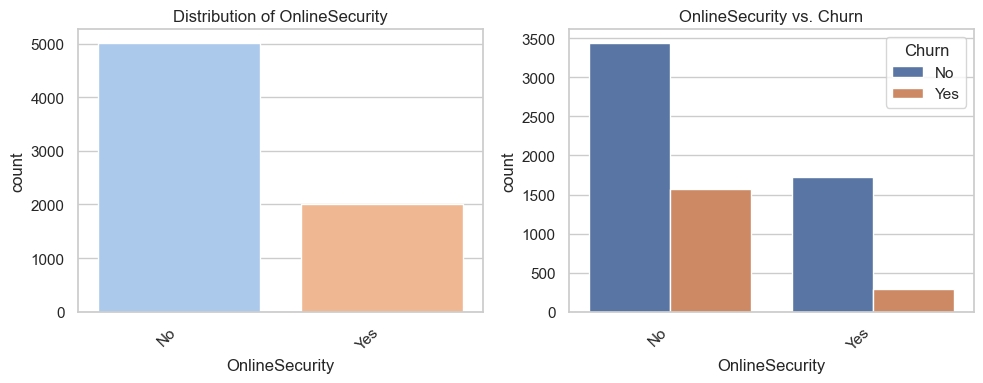

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


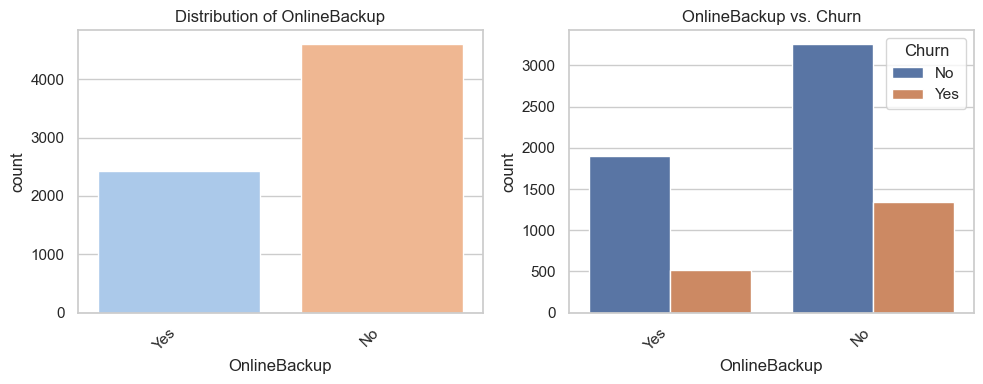

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


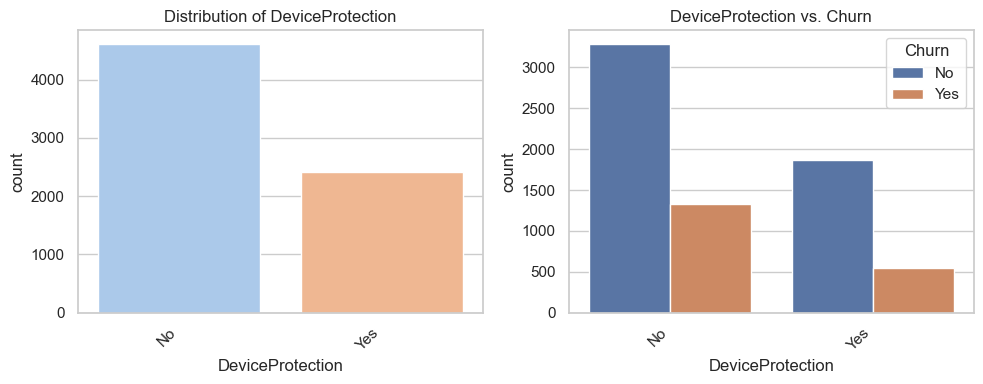

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


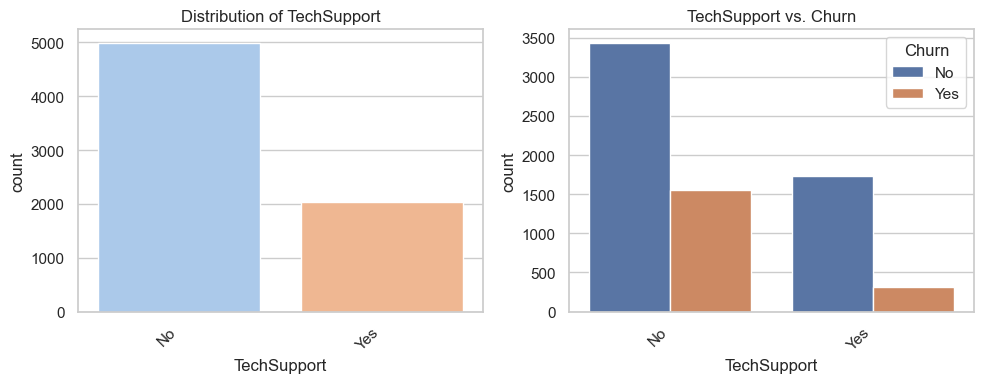

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


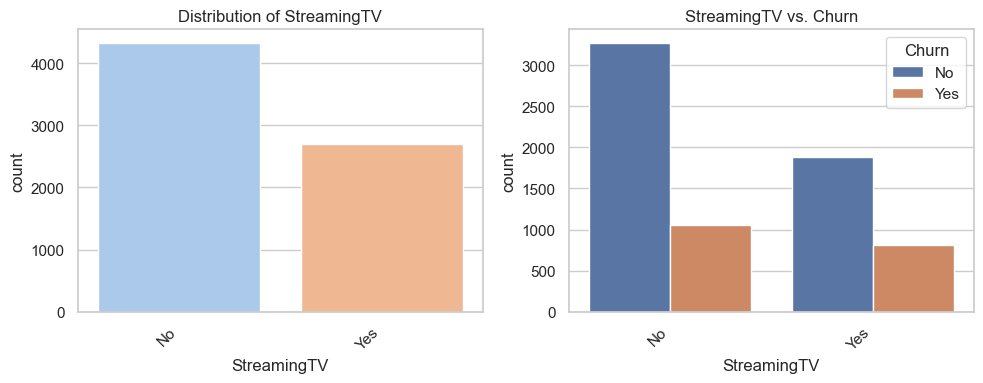

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


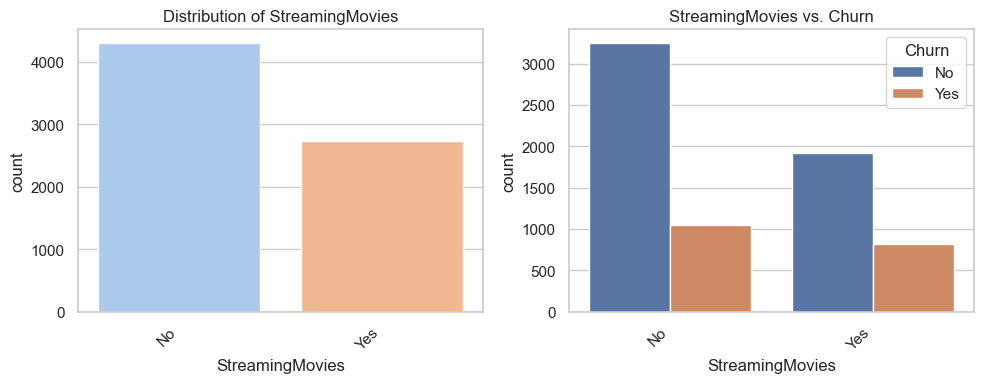

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


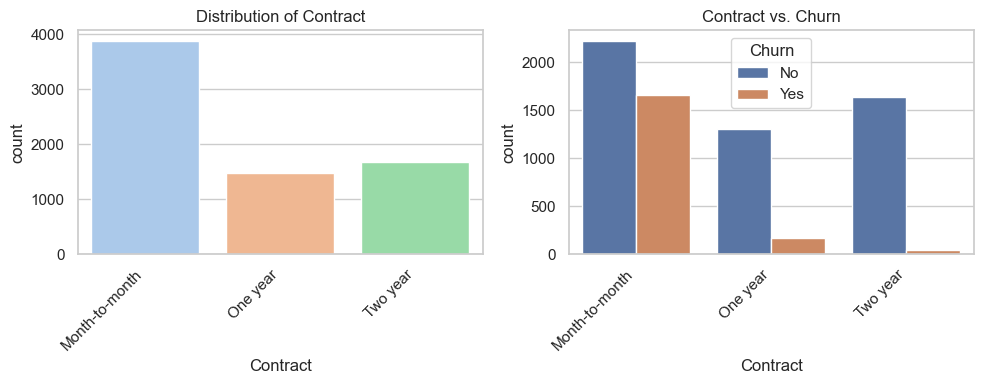

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


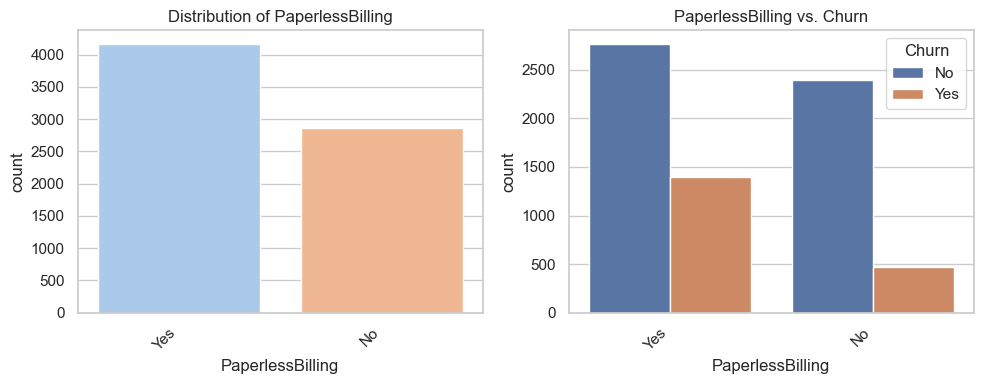

C:\Users\khoma\AppData\Local\Temp\ipykernel_171000\2078314288.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='pastel')


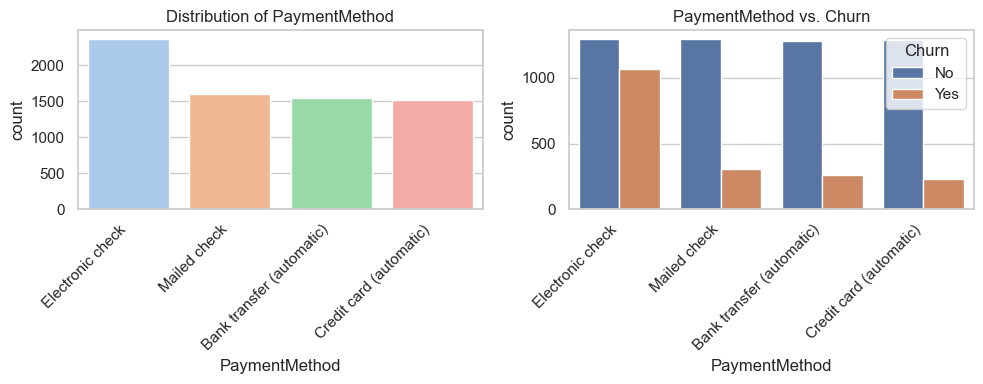

In [ ]:
# A list of your categorical features to check
features_to_plot = [
    'gender', 
    'Partner', 
    'Dependents', 
    'PhoneService', 
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'Contract', 
    'PaperlessBilling', 
    'PaymentMethod'
]

for feature in features_to_plot:
    plt.figure(figsize=(10, 4)) 
    
    # Plot 1: The distribution
    plt.subplot(1, 2, 1) 
    sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right') 

    # Plot 2: The relationship with Churn
    plt.subplot(1, 2, 2) 
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'{feature} vs. Churn')
    plt.xticks(rotation=45, ha='right') 
    
    plt.tight_layout() 
    plt.show() 


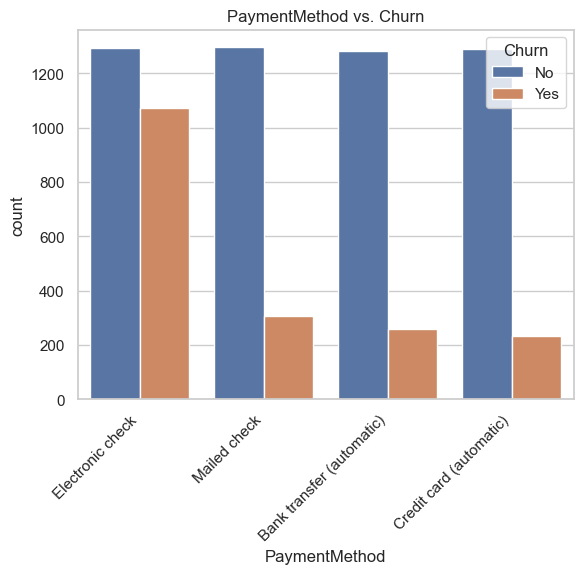

In [ ]:
sns.countplot(data=df, x="PaymentMethod", hue='Churn')
plt.title(f'{feature} vs. Churn')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.show() # Display the plots for this feature.

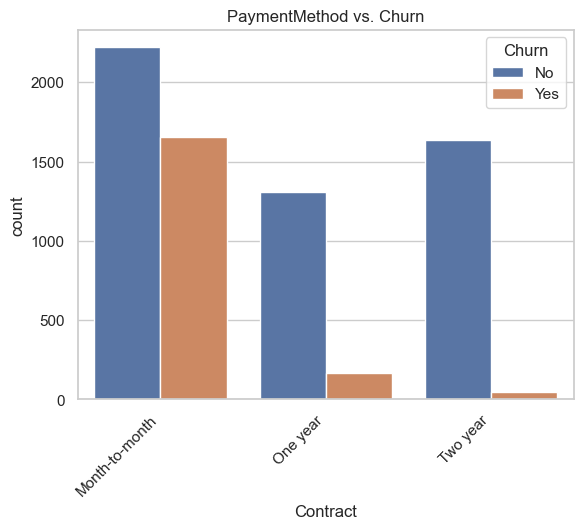

In [ ]:
sns.countplot(data=df, x="Contract", hue='Churn')
plt.title(f'{feature} vs. Churn')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.show() # Display the plots for this feature.

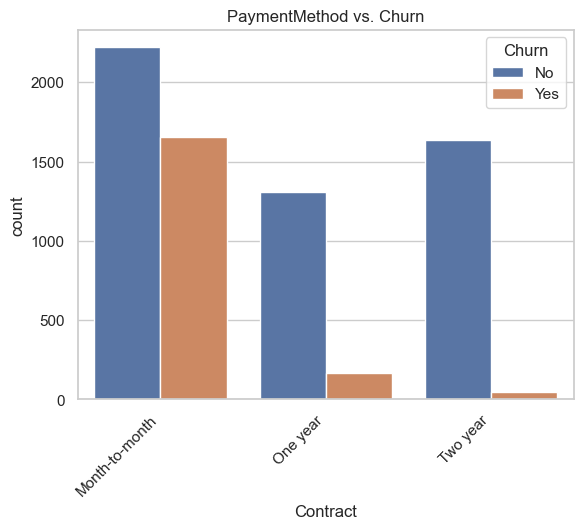

In [ ]:
sns.countplot(data=df, x="Contract", hue='Churn')
plt.title(f'{feature} vs. Churn')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.show() # Display the plots for this feature.

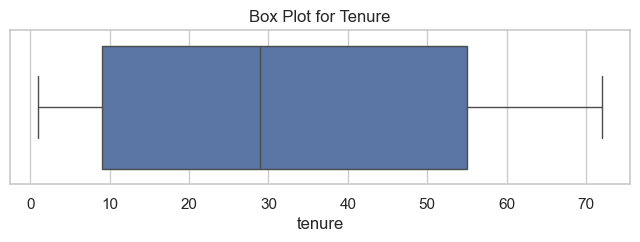

In [ ]:
# Checking the outliers 

### 1. Check for outliers in Tenure
plt.figure(figsize=(8,2))
sns.boxplot(data=df,x="tenure")
plt.title("Box Plot for Tenure")
plt.show()

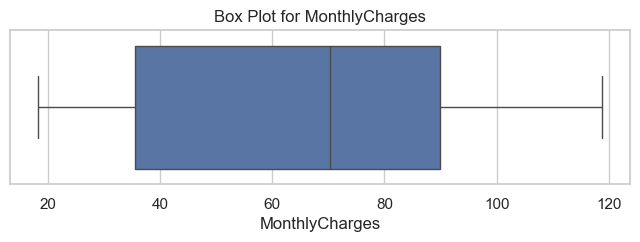

In [ ]:
### 2. Check for outliers in MonthlyCharges
plt.figure(figsize=(8,2))
sns.boxplot(data=df,x="MonthlyCharges")
plt.title("Box Plot for MonthlyCharges")
plt.show()

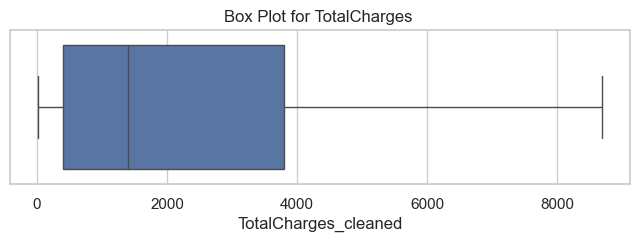

' \nRight-Skewed: The box is "bunched up" on the left side, and the right whisker is much longer than the left.\nThis tells you that most customers have lower TotalCharges, while a smaller number of customers have very high TotalCharges.\nThis makes perfect sense, as it matches our tenure hypothesis: most customers are newer (lower charges) and a few are long-term (high charges).\n\n'

In [ ]:
# 3. Check for outliers in TotalCharges
plt.figure(figsize=(8, 2))
sns.boxplot(data=df, x='TotalCharges_cleaned')
plt.title('Box Plot for TotalCharges ')
plt.show()


### Exploratory Data Analysis (EDA) & Hypothesis Testing

After visualizing the distributions, I formulated and tested several hypotheses to understand the drivers of churn.

#### 1. The "Contract" Hypothesis
**Observation:** The 'Month-to-Month' contract bar shows a very high Churn rate, whereas 'One Year' and 'Two Year' contracts have minimal churn.

**Hypothesis:**
* *Are Month-to-Month customers mostly new users who haven't established trust yet?*
* *Are Long-term contract users simply "loyal" by tenure?*

**Validation (Bivariate Analysis):**
I compared `Contract` against `Tenure` using a Box Plot.
* **Result:** The 'Month-to-Month' box plot is centered at a very low tenure, while 'Two Year' contracts are centered at high tenure.
* **Conclusion:** **Confirmed.** The data supports the hypothesis. Month-to-Month customers are primarily new customers (median tenure ~28 months or lower) who are at the highest risk of leaving before they establish loyalty.

---

#### 2. The "Investment" Hypothesis (Add-ons)
**Observation:** Customers without services like `OnlineSecurity`, `OnlineBackup`, or `TechSupport` appear to churn more frequently.

**Hypothesis:**
* *Is buying an add-on service a sign of loyalty/stickiness, regardless of the contract length?*

**Validation:**
I analyzed the relationship between `OnlineSecurity` and `Churn`.
* **Result:** The 'No Online Security' group has a dramatically higher churn portion than the 'Yes' group. Interestingly, the decision to buy security appears independent of contract length (it happens in both short and long contracts).
* **Conclusion:** **Confirmed.** `OnlineSecurity` (and similar add-ons) is a strong predictor of retention. Customers who are "invested" enough in the ecosystem to buy add-ons are "stickier" and less likely to leave.

---

#### 3. Feature Impact Ranking
Based on the visualization analysis, I classified the features by their predictive power regarding Churn:

| Impact Level | Features |
| :--- | :--- |
| **🚨 High Impact** | Contract, PaymentMethod, PaperlessBilling, Dependents, InternetService, OnlineSecurity, TechSupport |
| **⚠️ Medium Impact** | Partner |
| **🟢 Low Impact** | MultipleLines, StreamingTV, StreamingMovies, Gender , Dependent |


---

###  Summary of EDA Findings
1.  **Payment Friction:** Customers using **Electronic Check** (manual payment) churn far more often than those on automatic payment methods (Credit Card/Bank Transfer).
2.  **Contract Risk:** **Month-to-Month** contracts are the single biggest predictor of churn.
3.  **Service Stickiness:** Customers utilizing support services (**TechSupport, OnlineBackup, DeviceProtection**) are highly unlikely to churn.
4.  **Internet Type:** Customers with **Fiber Optic** service show higher churn rates compared to DSL (likely due to higher costs or competitive offers).

# 4-feature-engineering

In [ ]:
#I removed some low-impactful vars and also IDs values because it will only cause the model to overfit
df_model = df.drop(columns=['customerID', 'gender',"MultipleLines","StreamingTV","StreamingMovies"])

In [ ]:
# Mapping the Target Variable
df_model["Churn"]=df_model["Churn"].map({ 'Yes':1 , 'No':0 })

### 3-2)-Dealing with categorical features 

In [ ]:
#OrdinalEnding for Contract Variable: 
contract_mapping={'Month-to-month':0,'One year':1,'Two year':2}
df_model["Contract"]=df_model["Contract"].map(contract_mapping)

In [ ]:
#One-hot Encoding for these variables :
df_model=pd.get_dummies(df_model,columns=["PaymentMethod","Partner","PaperlessBilling","TechSupport","DeviceProtection","OnlineBackup","OnlineSecurity","InternetService","PhoneService","Dependents"],drop_first=True)
""" 
df_model = pd.get_dummies(df_model, drop_first=True) => lazy command , it will change all features that has object type

"""


' \ndf_model = pd.get_dummies(df_model, drop_first=True) => lazy command , it will change all features that has object type\n\n'

### 3-3-Scaling Numerical Columns (The float and int types)

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features=["tenure",'MonthlyCharges',"TotalCharges_cleaned"]

#Initalize the scaler
scaler=StandardScaler()
#Apply the scalar
df_model[numerical_features]=scaler.fit_transform(df_model[numerical_features])

In [ ]:
df_model.describe()
df_model = df_model.drop(columns=["SeniorCitizen"])

### 5.1. Feature Selection (Low-Impact Variables)
The first step is to remove features that do not contribute to predictive power. This is crucial for building a robust model:
* It **reduces noise** that can confuse the model.
* It **decreases complexity** and training time.
* A simpler, more focused model is easier to explain and more likely to generalize to new data.

**Action:** Based on the EDA, `customerID`  and `gender` (showed very low predictive impact) were dropped.

---

### 5.2. Encoding Categorical Variables
Our dataset contains two types of categorical data (text) that must be converted to numbers.

#### A. Ordinal Encoding :
* **What:** Used for features with a meaningful, intrinsic order (e.g., Small < Medium < Large).
* **Action:** The `Contract` feature was the only ordinal variable. I manually mapped its values to preserve its logical rank:
    * `'Month-to-month': 0`
    * `'One year': 1`
    * `'Two year': 2`

#### B. One-Hot Encoding (for "Nominal" Data)
* **What:** Used for features with no inherent order (like, 'Color' or 'City'). It creates new binary columns for each category.
* **Strategy:** I followed a rule based on cardinality (number of unique values):
    * **< 20 Unique Values:** Proceed with One-Hot Encoding.
    * **> 50 Unique Values:** Consider Target Encoding or Binning (this was not necessary for our dataset).
* **Action:** All other categorical columns (`PaymentMethod`, `InternetService`, etc.) were One-Hot Encoded using `pd.get_dummies()`.

> **Important highlight : Avoiding the "Dummy Variable Trap"**
> When One-Hot Encoding, I set `drop_first=True`. This is a best practice to avoid **multicollinearity** , it's basically a situation where one feature can be perfectly predicted by others (like `PhoneService_No` is just `1 - PhoneService_Yes`).
>
> By dropping one of the categories, we capture all the information in fewer columns without redundancy. This is critical for stabilizing linear models like **Logistic Regression**.

---

### 5.3. Scaling Numerical Features
* **Why:** Algorithms like Logistic Regression are very sensitive to the scale of the data. A feature that ranges from 0-72 (like `tenure`) would have a different "weight" than a feature ranging from 0-8000 (like `TotalCharges`), even if it's not more important.
* **Action:** I applied `StandardScaler` from scikit-learn to all numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`). This rescales the data to have a mean of 0 and a standard deviation of 1.

### 5.4. Target Variable
Finally, the target variable `Churn` was converted from text to a binary integer:
* `'No'` $\rightarrow$ `0`
* `'Yes'` $\rightarrow$ `1`

At the end of this step, the dataset is fully numerical and ready for modeling.

# 5-model-training :

After engineering our features, the data is 100% numerical and ready for modeling. My strategy is to:
1.  Build a simple baseline model.
2.  Identify its weaknesses (especially around the class imbalance).
3.  Optimize the model by correcting for those weaknesses.
4.  Compare its performance against more complex, "industry-standard" algorithms.

In [ ]:
#Step A: Separate Features (X) and Target (y)
X=df_model.drop(columns="Churn",axis=1)
y=df_model["Churn"]


In [ ]:
#Step B : Seperating the Data : 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (5625, 17)
Testing shape: (1407, 17)


First, I split the data into a Training Set (80%) and a Testing Set (20%). The model will learn from the training data and be judged on the unseen test data.

 1-When separating our features (X) from our target (y), I used `X = df_model.drop('Churn', axis=1)`.
 * **`axis=0`** (the default) refers to **ROWS**.
 * **`axis=1`** refers to **COLUMNS**.
 
 2- We must specify `axis=1` to tell pandas to drop the *column* named 'Churn'. A common alternative is the more readable `X = df_model.drop(columns=['Churn'])`.

In [ ]:
#Step C : Training the model : 
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
# Step D: Evaluate (The Moment of Truth)
from sklearn.metrics import accuracy_score , classification_report

y_pred=model.predict(X_test)

# Checking the accuracy 
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [ ]:
# 3. See the detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



My first model is a standard Logistic Regression.

**Initial Analysis (Recall: 0.52):**
* The model achieved ~79% accuracy, but the Classification Report shows this is a "lazy" model.
* **Recall for Class 1 (Churn) was only 0.52.** This is a critical failure. It means the model failed to find **48%** of the customers who are actually leaving.
* This is a direct result of the class imbalance. The model favored the majority class (No Churn) to get a high accuracy score, but it's useless for our business goal.


### Solution A: The "One-Line Fix" (Class Weights)

In [ ]:
model=LogisticRegression(class_weight='balanced',random_state=42)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407



### 6.3. Optimized Model: Logistic Regression with Class Weights

To fix this, I re-trained the model, forcing it to pay more attention to the minority class.

**Action:** I set `class_weight='balanced'` in the `LogisticRegression()` parameters. This penalizes the model more heavily for misclassifying a "Churn" customer.

**Result (Recall: 0.80):**
* **Recall for Class 1 improved from 52% to 80%!** The model can now find 8 out of 10 real churners.
* **The Trade-Off:** To achieve this, **Precision for Class 1 dropped from 62% to 50%**. This is an acceptable trade-off. It means that for every 10 customers the model flags as "at-risk," 5 will be false alarms. For a churn problem, this is a much better business outcome.


### Let's investigate  which features the model now relies on the most : 

In [ ]:
# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]  # Access the coefficients for class 1
})

# Sort by the absolute value of the coefficient (strongest impact)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance.head(10))

                           Feature  Coefficient  Abs_Coefficient
0                           tenure    -1.344265         1.344265
15                PhoneService_Yes    -1.002249         1.002249
1                         Contract    -0.761456         0.761456
3             TotalCharges_cleaned     0.680016         0.680016
2                   MonthlyCharges     0.679232         0.679232
12              OnlineSecurity_Yes    -0.546471         0.546471
9                  TechSupport_Yes    -0.518832         0.518832
5   PaymentMethod_Electronic check     0.302357         0.302357
16                  Dependents_Yes    -0.269379         0.269379
8             PaperlessBilling_Yes     0.261513         0.261513


### 6.4. Model Interpretation: "Why" Do Customers Churn?

The optimized Logistic Regression model gives us clear, interpretable **coefficients**. The sign (+/-) tells us the direction of the impact, and the size (magnitude) tells us its strength.

**Top Predictive Features:**
1.  **`tenure` (-1.34):** . Every additional month a customer stays makes them significantly *less* likely to churn.
2.  **`Contract` (-0.76):** . As the contract value increases (from M2M=0 to Two Year=2), the likelihood of churn *decreases* strongly. This confirms our EDA hypothesis.
3.  **`MonthlyCharges` (+0.68):** **(High Churn Risk)**. Higher monthly bills significantly *increase* the likelihood of churning, pointing to price sensitivity.
4.  **`OnlineSecurity_Yes` (-0.55):** **(Key Retention Factor)**. Customers who subscribe to this add-on are *less* likely to churn.
5.  **`PaymentMethod_Electronic check` (+0.30):** **(High Churn Risk)**. Customers using this manual, high-friction payment method are *more* likely to churn.


## Let's Maximize the performance

In [ ]:
# Using Rnadom Forest is much better at capturing complex interactions btw these features
""" 

But be careful , Rabdil forest is often influenced with majority of class so he might give bad results for imbalance class ,
 so an expert data scientist combine the robustness of Random Forest with the correction for imbalance we learned from the logistic Regression


"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model=RandomForestClassifier(random_state=42)

rf_model.fit(X_train,y_train)

y_pred_rf=rf_model.predict(X_test)

print("Random Forest Classification Report :")
print(classification_report(y_test,y_pred_rf))

Random Forest Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
rf_model_optimized=RandomForestClassifier(class_weight='balanced',random_state=42)

rf_model_optimized.fit(X_train,y_train)

y_pred_optimized=rf_model_optimized.predict(X_test)

print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
rf_model_tuned=RandomForestClassifier(class_weight='balanced',n_estimators=300,random_state=42)

rf_model_tuned.fit(X_train, y_train)

# Predict
y_pred_tuned = rf_model_tuned.predict(X_test)

# Evaluate
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model=XGBClassifier(
    scale_pos_weight=3,
    random_state=42,
    n_estimator=100,
    max_depth=4,  # It keeps the tree depth shallow to prevent overfitting
    learing_rate=0.1
)

xgb_model.fit(X_train,y_train)

y_pred_xgb=xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.73      0.74      1407



### 6.5. Model Comparison: Can We Do Better?

Is a more complex model (Random Forest, XGBoost) better?

### A. Random Forest
* **Hypothesis:** A tree-based model could capture complex, non-linear patterns.
* **Result:** Even after tuning `class_weight='balanced'` and other parameters, the Random Forest model **failed to perform**. Its Recall score was significantly lower (0.46) than the Logistic Regression.
* **Reason:** Random Forest builds trees independently and averages them. On this dataset, the majority class (No Churn) still dominated the "average" vote, and the model failed to find the minority class.

### B. Gradient Boosting (XGBoost)
* **Hypothesis:** XGBoost builds trees *sequentially*, with each new tree focusing on the errors of the last. It is designed to "hunt down" hard-to-find cases (our churners).
* **Result:** XGBoost performed very well (Recall 0.76) but **still could not beat** the simple Logistic Regression model's Recall of 0.80.

---

# 6-model-evaluation-results
**The Champion Model is the Optimized Logistic Regression.**

This is a classic data science lesson: **the simplest solution is often the best.**

* **Linear Relationships:** The advanced models failed because the *true* relationships in this data are **linear**. Our coefficient analysis proved this: "More Tenure = Less Churn" (a straight line), "Higher Contract = Less Churn" (a straight line).
* **Signal vs. Noise:** The complex models (XGBoost) are so powerful that they "over-thought" the problem, trying to find wiggly patterns in what was just noise. The Logistic Regression model correctly drew a straight line through the strong, simple signals.

**Final Verdict:** The **Logistic Regression with `class_weight='balanced'`** is the best model. It's fast, highly interpretable (giving us the "Why"), and provides the highest Recall score for our business goal.

# 7-project-report

## 1. Executive Summary : 
### Goal: Identify customers at risk of leaving (churning) and determine the key drivers of dissatisfaction. 

### Result: Developed a Machine Learning model (Logistic Regression) optimized for churn detection. 

### Performance: The model successfully identifies 80% of at-risk customers (Recall = 0.80). This allows the marketing team to intervene before these customers leave, potentially saving significant revenue.



## 2. Key Risk Factors (The "Why")

### 1- The `Month-to-Month` Trap : Customers on short-term contracts are the highest risk group. They have no commitment and can leave anytime. Probably improve 'Month-to-Month' contract benefits or remove it and make '3-Months' plan instead.

### 2- Payment Friction (Electronic Check) : Customers who pay via `electronic Check` churn significantly more than those on automatic payments. The fact that they checking at the end of each month the bill to pay , probably they are either students or have a not a stable income so their easiest way to reduce the bills to not pay and eventually lose a customer.

### 3- Lack of investment : Customers who do not subscribe to add-on services like Online Security or Tech Support are much easier to poach.

### 4-Price sensibility : Higher `MonthlyCharges` correlate directly with higher churn , suggesting some customers simply find the service too expensive relative to the value

### 5-Internet Service : Customers who pays  `internet service` like DSL to Fibre optique  are high likely to churn more than those who doesn't pay internet service. So there is an issue with the internet service and the company needs to know the source of the problem by creating a survey to customers , maybe the service provides a low quality experience to clients that lead them to churn.

# 8-business-recommendations
### In order to reduce the churn and increase revenue , I recommend the following three actions :


## Strategy A: The "Auto-Pay" Incentive
### Insight: Manual payments drive churn.
### Action: Launch a campaign targeting "Electronic Check" users. Offer a one-time $10 credit or a 5% monthly discount if they switch to Automatic Credit Card Payment.
### Goal: Remove the monthly "decision to pay" friction.

##  Strategy C: The "Tenure" Bridge
### Insight: Churn is highest in the first few months (low tenure).
### Action: Create a "Loyalty Bridge" program for Month-to-Month users. If they stay for 6 months, offer them a free upgrade if they sign a 1-Year Contract.
### Goal: Move risky short-term customers into safe long-term contracts.